In [5]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('C:\diabetes.csv')

In [6]:
# Просмотр первых нескольких строк
print(data.head())

# Получение информации о данных
print(data.info())

# Описание статистических характеристик
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Обучение модели
model = RandomForestClassifier()
model.fit(X, y)

# Отбор признаков
selector = SelectFromModel(model, prefit=True)
X_selected = selector.transform(X)

# Получение отобранных признаков
selected_features = X.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


c:\Users\Дом\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [8]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Создание и обучение модели
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Оценка значимости признаков
importance = lgb_model.feature_importances_
print("Важность признаков:", importance)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [12]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.2/124.9 MB 701.4 kB/s eta 0:02:58
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.6/124.9 MB 1.8 MB/s eta 0:01:10
   ----------


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 81.9/456.1 kB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 204.8/456.1 kB 2.5 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/456.1 kB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 389.1/456.1 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 4.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.7 MB 3.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 3.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.7 MB 3.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/2.7 MB 2.6 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


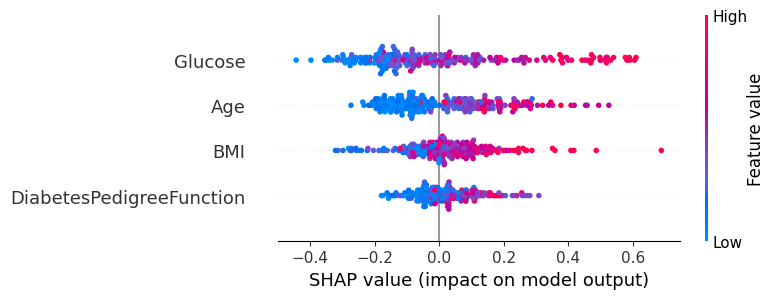

In [15]:
import shap
import xgboost
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('C:\diabetes.csv')

X = pd.DataFrame(data, columns=selected_features)
y = data['Outcome']
X.head()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели XGBoost
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

# Инициализация Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Визуализация SHAP значений
shap.summary_plot(shap_values, X_test)
